In [1]:
from astropy.table import Table, join
import numpy as np
from scipy import stats
import statsmodels.api as sm
from distfit import distfit

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullFormatter
%matplotlib inline

In [2]:
# K - Gaia
k2g = Table.read("../data/icrf3k_gedr3_all_combined.fits")

num_sou = len(k2g)

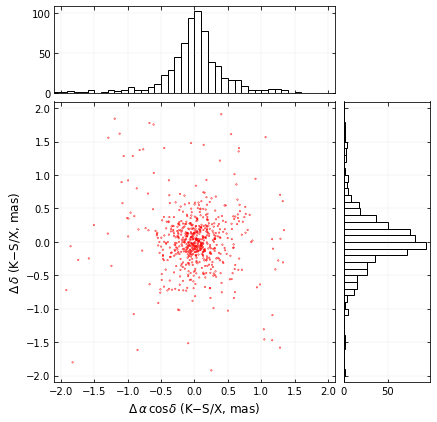

In [3]:
x, y = k2g["dra_cor"], k2g["ddec_cor"]

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.12, 0.65
bottom, height = 0.12, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(6., 6.))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y, s=2, lw=0.5, facecolors="None", edgecolors="r")
axScatter.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (K$-$S/X, mas)", fontsize=12)
axScatter.set_ylabel("$\Delta\,\delta$ (K$-$S/X, mas)", fontsize=12)

# now determine nice limits by hand:
binwidth = 0.1
xymax = 2
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins, fill=False)
axHisty.hist(y, bins=bins, orientation="horizontal", fill=False)

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axScatter.grid(lw=0.1)
axHistx.grid(lw=0.1)
axHisty.grid(lw=0.1)

# plt.savefig("../plots/k-sx-scatter.eps", hbox="tight")

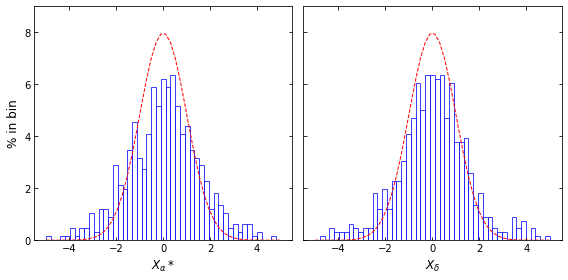

In [4]:
# Difference in RA and decl.
x, y = k2g["nor_ra_cor"], k2g["nor_dec_cor"]
bins_array = np.linspace(-5, 5, 50)
weights = np.ones(num_sou) * 100. / num_sou 

fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2, sharey=True)
ax0.hist(x, bins_array, weights=weights, facecolor='w', alpha=0.75, edgecolor="b")
ax1.hist(y, bins_array, weights=weights, facecolor="w", edgecolor="b", alpha=0.75)

# add a '(standard) Gaussian distribution' line
Gaussian_dist = stats.norm.pdf(bins_array, 0, 1) * 10. / 50
ax0.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)
ax1.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)

ax0.set_yticks(np.arange(0, 26, 2))
ax1.set_yticks(np.arange(0, 26, 2))

ax0.set_ylim([0, 9])
ax1.set_ylim([0, 9])

ax0.set_xlabel("$X_\\alpha*$", fontsize=12)
ax1.set_xlabel("$X_\\delta$", fontsize=12)

ax0.set_ylabel("% in bin", fontsize=12)
# ax1.set_ylabel("% in bin")

fig.tight_layout()
plt.show()

For Normalized offset in RA (K - EDR3)
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0311560] [loc=0.160 scale=4.276] 
[distfit] >[expon     ] [RSS: 0.0791563] [loc=-39.610 scale=39.770] 
[distfit] >[pareto    ] [RSS: 0.0789709] [loc=-13880407161.987 scale=13880407122.377] 
[distfit] >[dweibull  ] [RSS: 0.0043522] [loc=0.204 scale=1.534] 
[distfit] >[t         ] [RSS: 0.0010837] [loc=0.047 scale=1.173] 
[distfit] >[genextreme] [RSS: 0.0486140] [loc=-1.568 scale=6.525] 
[distfit] >[gamma     ] [RSS: 0.0824005] [loc=-39.610 scale=2.134] 
[distfit] >[lognorm   ] [RSS: 0.0292693] [loc=-110.634 scale=110.717] 
[distfit] >[beta      ] [RSS: 0.0399355] [loc=-56.718 scale=261.770] 
[distfit] >[uniform   ] [RSS: 0.0772347] [loc=-39.610 scale=100.292] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


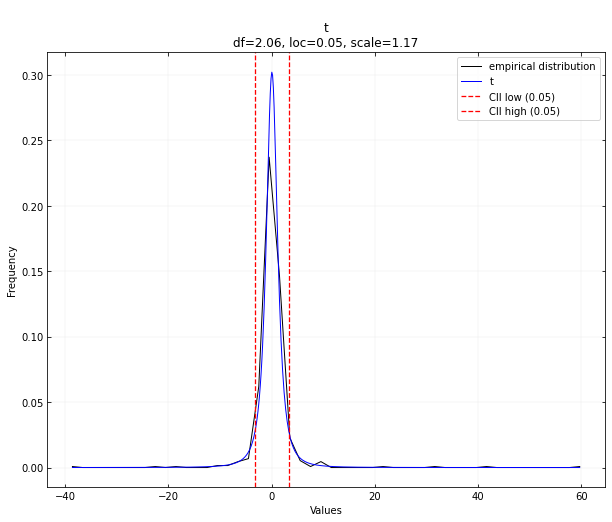

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nt\ndf=2.06, loc=0.05, scale=1.17'}, xlabel='Values', ylabel='Frequency'>)

In [5]:
print("For Normalized offset in RA (K - EDR3)")

dist = distfit()
dist.fit_transform(x)
dist.plot()

For Normalized offset in RA (K - EDR3)
        distr       RSS  LLE                 loc               scale  \
0           t  0.001084  NaN            0.046965            1.173339   
1    dweibull  0.004352  NaN            0.203958            1.533666   
2     lognorm  0.029269  NaN          -110.63351           110.71694   
3        norm  0.031156  NaN            0.160242            4.276112   
4        beta  0.039935  NaN          -56.718253          261.769533   
5  genextreme  0.048614  NaN           -1.568175            6.524545   
6     uniform  0.077235  NaN           -39.60984          100.292427   
7      pareto  0.078971  NaN -13880407161.987049  13880407122.377209   
8       expon  0.079156  NaN           -39.60984           39.770082   
9       gamma  0.082401  NaN           -39.60984            2.133531   

                                      arg  
0                   (2.0564911191910804,)  
1                      (0.8302086345371,)  
2                 (0.036881748524825

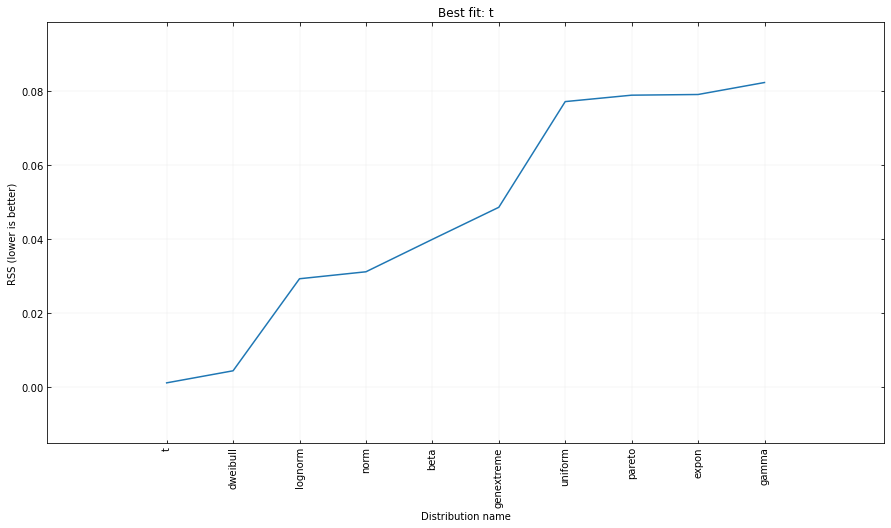

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: t'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [6]:
print("For Normalized offset in RA (K - EDR3)")

# All scores of the tested distributions
print(dist.summary)

# Distribution parameters for best fit
dist.model

# Make plot
dist.plot_summary()

For Normalized offset in Dec (K - EDR3)
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0609660] [loc=-0.241 scale=3.221] 
[distfit] >[expon     ] [RSS: 0.1831364] [loc=-41.044 scale=40.803] 
[distfit] >[pareto    ] [RSS: 0.1855192] [loc=-885111286.627 scale=885111245.583] 
[distfit] >[dweibull  ] [RSS: 0.0113585] [loc=-0.213 scale=1.370] 
[distfit] >[t         ] [RSS: 0.0024747] [loc=0.032 scale=1.081] 
[distfit] >[genextreme] [RSS: 0.0874509] [loc=-1.243 scale=4.280] 
[distfit] >[gamma     ] [RSS: 0.1283018] [loc=-84.975 scale=0.750] 
[distfit] >[lognorm   ] [RSS: 0.0623127] [loc=-389.916 scale=389.568] 
[distfit] >[beta      ] [RSS: 0.0425617] [loc=-1753921343.496 scale=1753921354.175] 
[distfit] >[uniform   ] [RSS: 0.1704386] [loc=-41.044 scale=50.660] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


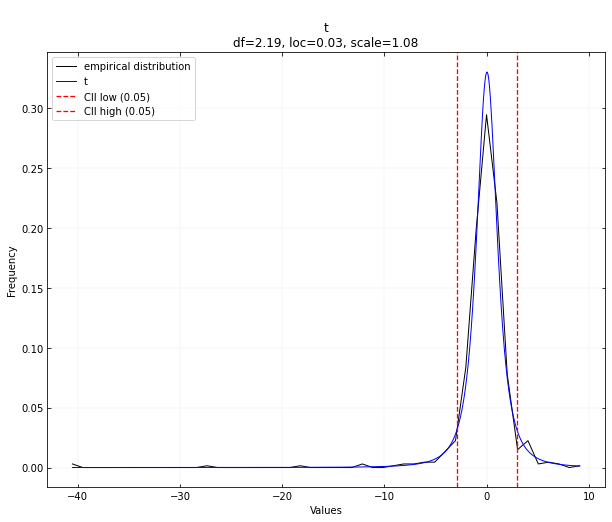

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nt\ndf=2.19, loc=0.03, scale=1.08'}, xlabel='Values', ylabel='Frequency'>)

In [7]:
print("For Normalized offset in Dec (K - EDR3)")

dist = distfit()
dist.fit_transform(y)
dist.plot()

For Normalized offset in Dec (K - EDR3)
        distr       RSS  LLE                loc              scale  \
0           t  0.002475  NaN           0.032384           1.081035   
1    dweibull  0.011359  NaN          -0.213127           1.369857   
2        beta  0.042562  NaN -1753921343.496408  1753921354.175289   
3        norm  0.060966  NaN          -0.240902           3.221255   
4     lognorm  0.062313  NaN        -389.916375          389.56821   
5  genextreme  0.087451  NaN           -1.24291            4.28008   
6       gamma  0.128302  NaN         -84.974991           0.749909   
7     uniform  0.170439  NaN         -41.043956          50.660004   
8       expon  0.183136  NaN         -41.043956          40.803054   
9      pareto  0.185519  NaN  -885111286.626839   885111245.582884   

                                        arg  
0                       (2.19302450449375,)  
1                     (0.8744046330031403,)  
2  (2662458549.2379646, 16.622393473052725)  
3    

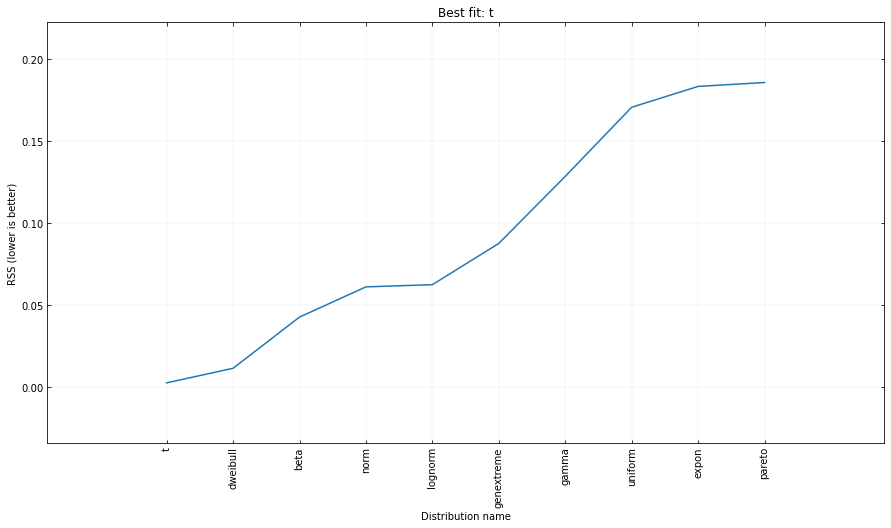

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: t'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [8]:
print("For Normalized offset in Dec (K - EDR3)")

# All scores of the tested distributions
print(dist.summary)

# Distribution parameters for best fit
dist.model

# Make plot
dist.plot_summary()

Text(0, 0.5, '% in bin')

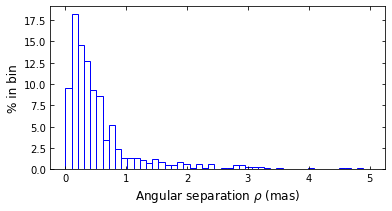

In [9]:
# Distribution of normalized separation
x = k2g["ang_sep_cor"]
bins_array = np.linspace(0, 5, 50)
weights = np.ones(num_sou) * 100. / num_sou

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(x, bins_array, weights=weights, 
        facecolor="w", edgecolor="b")

# ax.set_xlim([0, 10])
ax.set_xlabel("Angular separation $\\rho$ (mas)", fontsize=12)
ax.set_ylabel("% in bin", fontsize=12)
# ax.grid()

# plt.savefig("../plots/rho_icrf3sx_gaiaedr3.eps")

For Angular offset (K - EDR3)
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.8614942] [loc=0.717 scale=1.840] 
[distfit] >[expon     ] [RSS: 0.0739307] [loc=0.006 scale=0.711] 
[distfit] >[pareto    ] [RSS: 0.0764211] [loc=-0.588 scale=0.594] 
[distfit] >[dweibull  ] [RSS: 0.0937297] [loc=0.290 scale=0.367] 
[distfit] >[t         ] [RSS: 0.2659077] [loc=0.327 scale=0.204] 
[distfit] >[genextreme] [RSS: 0.0248161] [loc=0.259 scale=0.230] 
[distfit] >[gamma     ] [RSS: 1.1409003] [loc=0.006 scale=1.548] 
[distfit] >[lognorm   ] [RSS: 0.0009278] [loc=-0.001 scale=0.374] 
[distfit] >[beta      ] [RSS: 0.0921036] [loc=0.006 scale=436.631] 
[distfit] >[uniform   ] [RSS: 1.2702287] [loc=0.006 scale=32.937] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


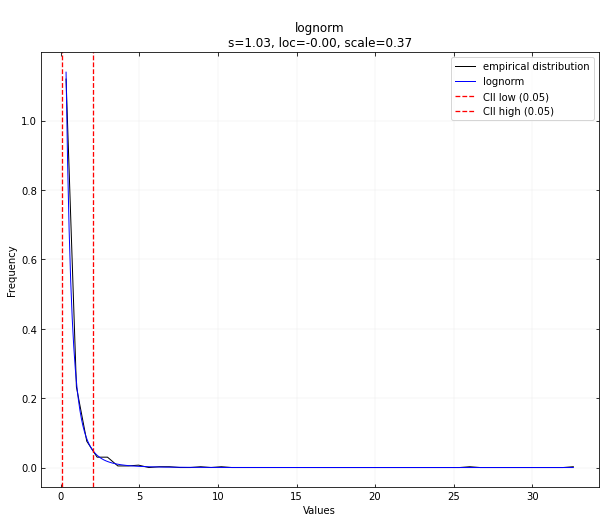

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nlognorm\ns=1.03, loc=-0.00, scale=0.37'}, xlabel='Values', ylabel='Frequency'>)

In [10]:
print("For Angular offset (K - EDR3)")

dist = distfit()
dist.fit_transform(x)
dist.plot()

For Angular offset (K - EDR3)
        distr       RSS  LLE       loc       scale  \
0     lognorm  0.000928  NaN -0.001265    0.374218   
1  genextreme  0.024816  NaN  0.259342    0.229876   
2       expon  0.073931  NaN  0.006166    0.710947   
3      pareto  0.076421  NaN -0.588274    0.594441   
4        beta  0.092104  NaN  0.006166  436.631211   
5    dweibull   0.09373  NaN   0.28992    0.367158   
6           t  0.265908  NaN  0.326881    0.204379   
7        norm  0.861494  NaN  0.717113    1.840285   
8       gamma    1.1409  NaN  0.006166    1.547899   
9     uniform  1.270229  NaN  0.006166   32.937332   

                                       arg  
0                    (1.0337050373486543,)  
1                   (-0.6162301540258689,)  
2                                       ()  
3                    (1.5412281062215376,)  
4  (0.8489273549427234, 526.3293368081174)  
5                    (0.6859125757920148,)  
6                    (1.2676828497167871,)  
7              

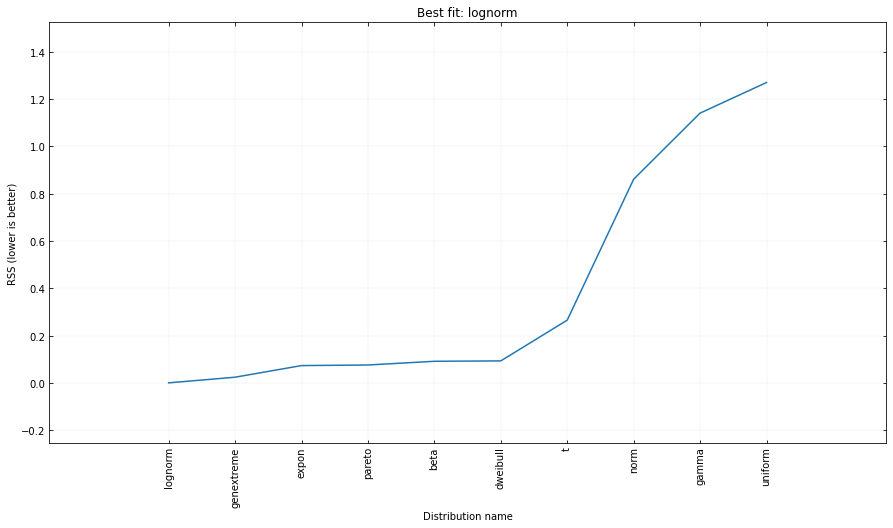

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: lognorm'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [11]:
print("For Angular offset (K - EDR3)")

# All scores of the tested distributions
print(dist.summary)

# Distribution parameters for best fit
dist.model

# Make plot
dist.plot_summary()

Text(0, 0.5, '% in bin')

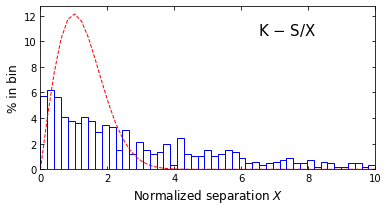

In [12]:
# Distribution of normalized separation
x = k2g["nor_sep_cor"]

bins_array = np.linspace(0, 10, 50)
weights = np.ones(num_sou) * 100. / num_sou

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(x, bins_array, weights=weights, 
        facecolor="w", edgecolor="b")

# add a '(standard) Reyleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 50  * 100
ax.plot(bins_array, rayleigh_dist, "r--", linewidth=1)

ax.text(6.5, 10.5, "K $-$ S/X", fontsize=15)

ax.set_xlim([0, 10])
ax.set_xlabel("Normalized separation $X$", fontsize=12)
ax.set_ylabel("% in bin", fontsize=12)
# ax.grid()

# plt.savefig("../plots/x_icrf3sx_gaiaedr3.eps")

For Normalized offset (K - EDR3)
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0000797] [loc=29.317 scale=242.483] 
[distfit] >[expon     ] [RSS: 0.0000122] [loc=0.000 scale=29.316] 
[distfit] >[pareto    ] [RSS: 0.0000858] [loc=-1.346 scale=1.346] 
[distfit] >[dweibull  ] [RSS: 0.0000894] [loc=1.288 scale=5.040] 
[distfit] >[t         ] [RSS: 0.0000993] [loc=1.774 scale=1.541] 
[distfit] >[genextreme] [RSS: 0.0000952] [loc=1.502 scale=1.792] 
[distfit] >[gamma     ] [RSS: 0.0000960] [loc=0.000 scale=2134.301] 
[distfit] >[lognorm   ] [RSS: 0.0000837] [loc=-0.012 scale=2.670] 
[distfit] >[beta      ] [RSS: 0.0000736] [loc=0.000 scale=16958.727] 
[distfit] >[uniform   ] [RSS: 0.0001048] [loc=0.000 scale=4700.392] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


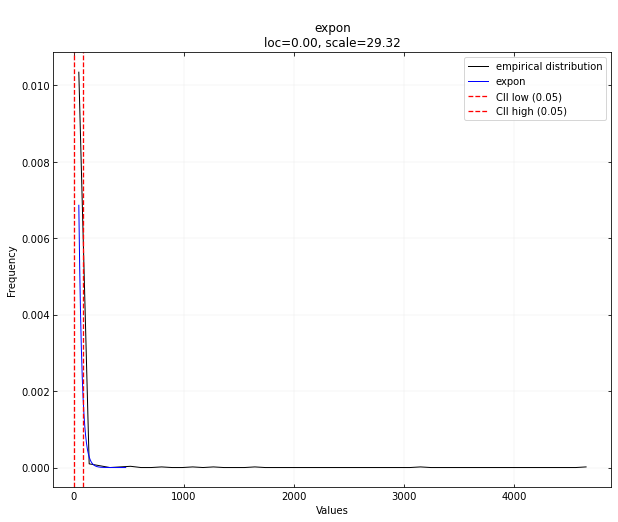

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nexpon\nloc=0.00, scale=29.32'}, xlabel='Values', ylabel='Frequency'>)

In [13]:
print("For Normalized offset (K - EDR3)")

dist = distfit()
dist.fit_transform(x)
dist.plot()

For Normalized  offset (K - EDR3)
        distr       RSS  LLE       loc         scale  \
0       expon  0.000012  NaN  0.000265     29.316485   
1        beta  0.000074  NaN  0.000265  16958.727098   
2        norm   0.00008  NaN  29.31675    242.482933   
3     lognorm  0.000084  NaN -0.012466      2.669648   
4      pareto  0.000086  NaN -1.346075       1.34634   
5    dweibull  0.000089  NaN  1.288376      5.039719   
6  genextreme  0.000095  NaN  1.502432      1.792151   
7       gamma  0.000096  NaN  0.000265   2134.301295   
8           t  0.000099  NaN  1.773506      1.541249   
9     uniform  0.000105  NaN  0.000265   4700.391648   

                                       arg  
0                                       ()  
1  (0.4572259222294566, 787.9316940539225)  
2                                       ()  
3                     (1.699033484409495,)  
4                    (0.7386626525087643,)  
5                    (0.4518453953710033,)  
6                   (-0.8274863385

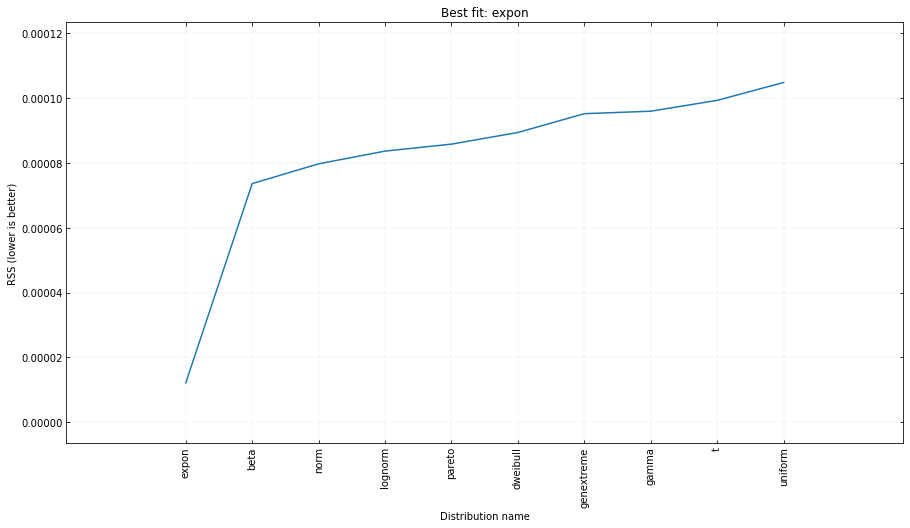

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: expon'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [14]:
print("For Normalized  offset (K - EDR3)")

# All scores of the tested distributions
print(dist.summary)

# Distribution parameters for best fit
dist.model

# Make plot
dist.plot_summary()

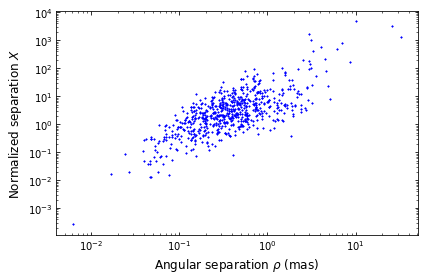

In [15]:
# Angular separation vs. normalized separation
fig, ax = plt.subplots()

ax.plot(k2g["ang_sep_cor"], k2g["nor_sep_cor"], "b*", ms=1.5, label="Used")

ax.set_ylabel("Normalized separation $X$", fontsize=12)
ax.set_xlabel("Angular separation $\\rho$ (mas)", fontsize=12)

ax.set_xscale("log")
ax.set_yscale("log")

fig.tight_layout()

What the relation between $X_\alpha$/$X_\delta$ and $\sigma_{VLBI}$/$\sigma_{Gaia}$ would be?

In [28]:
k2g.sort("ra_err_gedr3")
sig_g = np.array(k2g["ra_err_gedr3"])
x_g = np.array(k2g["dra_cor"])

k2g.sort("ra_err_icrf3k")
sig_v = np.array(k2g["ra_err_icrf3k"])
x_v = np.array(k2g["dra_cor"])

In [29]:
from CorrTest import NWSmooth

# Smoothing
sm_g = NWSmooth(sig_g, x_g)
sm_v = NWSmooth(sig_v, x_v)

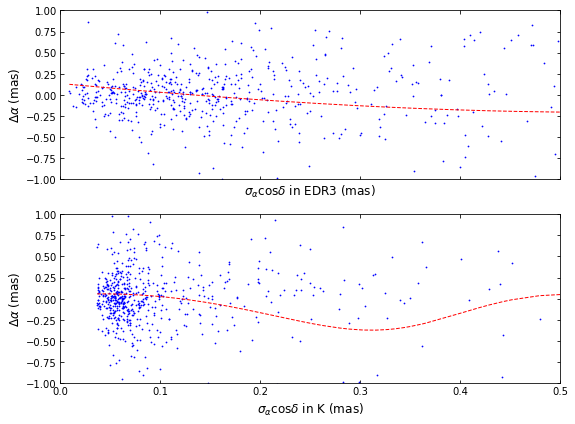

In [34]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 6), nrows=2, sharex=True, sharey=True)

ax0.plot(sig_g, x_g, "b.", ms=1.5, )
ax1.plot(sig_v, x_v, "b.", ms=1.5, )

ax0.plot(sig_g, sm_g, "r--", lw=1)
ax1.plot(sig_v, sm_v, "r--", lw=1)

ax0.set_ylim([-1, 1])
ax0.set_xlim([0, 0.5])
# ax0.set_xscale("log")
# ax1.set_xscale("log")

ax0.set_xlabel("$\sigma_\\alpha\cos\delta$ in EDR3 (mas)", fontsize=12)
ax1.set_xlabel("$\sigma_\\alpha\cos\delta$ in K (mas)", fontsize=12)

ax0.set_ylabel("$\Delta\\alpha$ (mas)", fontsize=12)
ax1.set_ylabel("$\Delta\\alpha$ (mas)", fontsize=12)

plt.tight_layout()